In [444]:
import random
import csv

In [445]:
def read_csv(file_path):
    with open(file_path, mode="r", encoding="utf-8") as file:
        reader = csv.reader(file)
        data = [row for row in reader]
    return data

In [446]:
def normalize_number_list(number_list):
    #normalize by value so the smallest number is 100
    smallest_value = min(number_list)
    factor_to_multiply = (1 / smallest_value) * 100
    number_list = [int(i*factor_to_multiply) for i in number_list]

    #normalize by value so no negative numbers
    smallest_value = min(number_list)
    if smallest_value < 0:
        number_to_add = abs(smallest_value) + 1
        number_list = [int(i + number_to_add) for i in number_list]

    return number_list


In [447]:
def get_random_point_list_from_csv(target_csv):
    content = random.choice(read_csv(target_csv))
    content = [float(i) for i in content]
    content = content[1:]
    content = normalize_number_list(content)
    points = []
    for i in range(0,len(content),2):
        x = content[i]
        y = content[i+1]
        point = (x,y)
        points.append(point)
        if i + 2 == len(content):
            break

    return points

In [448]:
import cv2
import numpy
import matplotlib.pyplot as plt


def draw_points_on_canvas(points):
    base_image = numpy.zeros((300, 300, 3), dtype=numpy.uint8)
    start_green_color = 255
    end_green_color = 0
    green_color_step = (end_green_color - start_green_color) / len(points)
    start_red_color = 0
    end_red_color = 255
    red_color_step = (end_red_color - start_red_color) / len(points)

    green_color = start_green_color
    red_color = start_red_color
    for point in points:
        x, y = int(point[0]), int(point[1])
        cv2.circle(base_image, (x, y), 1, (int(red_color), int(green_color), 0), -1)
        green_color += green_color_step
        red_color += red_color_step

    #add some text to the plot
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_color = (255, 255, 255)
    font_thickness = 1
    text = "red = new"
    text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]
    text_x = int((base_image.shape[1] - text_size[0]) / 2)
    text_y = base_image.shape[1] - 30
    cv2.putText(base_image, text, (text_x, text_y), font, font_scale, font_color, font_thickness)

    plt.imshow(base_image)
    plt.show()


def show_random_datum(csv_path):
    points = get_random_point_list_from_csv(csv_path)
    draw_points_on_canvas(points)

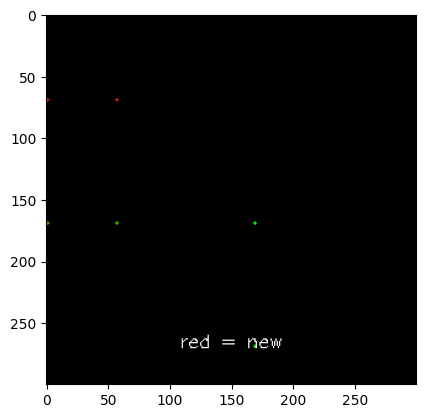

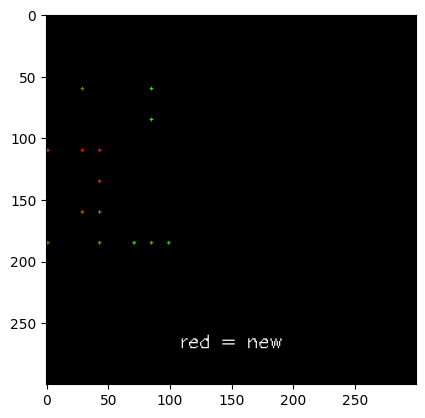

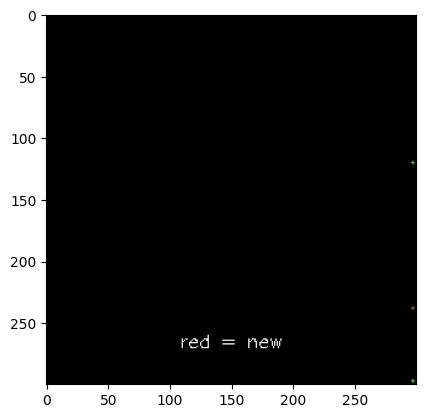

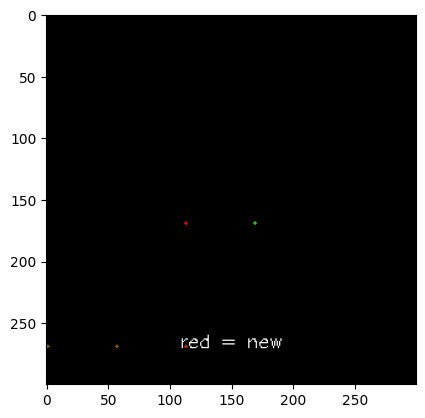

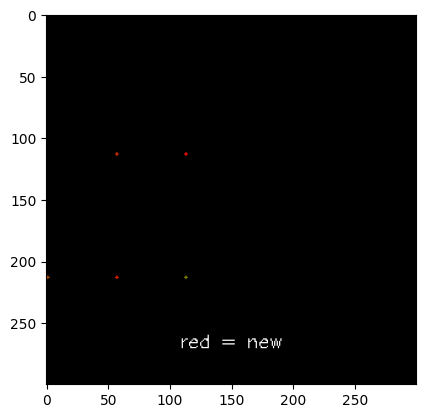

ZeroDivisionError: float division by zero

In [449]:
target_csv = r"synthetic_stop_0.csv"
target_csv = r'point_history_big3cut_0_still_pointer_cut_to_1000_.csv'
for i in range(10):
    show_random_datum(target_csv)